In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import read_missing
from sklearn.datasets import make_spd_matrix
from sklearn.impute import SimpleImputer, KNNImputer
from soft_impute import SoftImputer

try:
    from sklearnex import patch_sklearn
    patch_sklearn()
except ModuleNotFoundError as e:
    print(e)
from exp_max import ExpectationMaximization

# from exp_max import expectation_max, gaussian_linspace
# from exp_max import expectation_max_multi_var, rng, plot_cluster_2d, test_em

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
model = ExpectationMaximization()
model.fit(
        num_dims = 2,
        num_clusters = 6,
        mean_min = -10,
        mean_max = 10,
        cluster_size_min = 20,
        cluster_size_max = 1000
)

Generating data...
Data generated successfully.


Stopped after 3747 iterations, with change in likelihood 9.983125437429408e-11


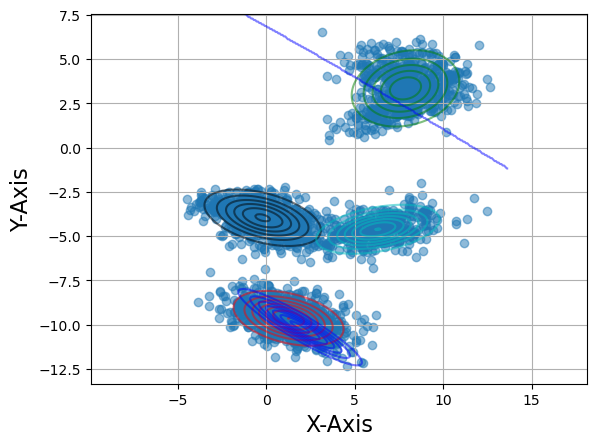

In [9]:
model.predict(5, 1e-10, 10_000).plot_2d()

In [10]:
df = read_missing("../Project/missing/MissingData1.txt").T
df

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.11,-0.30,0.50,0.00,0.40,0.39,0.50,-0.52,-0.87,-1.39,...,0.19,0.38,-0.06,0.12,-0.03,-0.45,0.12,1.31,0.34,-0.03
1,0.02,-0.37,0.18,-0.11,-0.16,-0.18,-0.24,-0.48,-0.17,-0.57,...,-0.27,0.10,-0.06,-0.18,0.36,-0.31,-0.27,0.05,0.03,-0.03
2,-0.36,-0.18,0.41,NaN,0.31,-0.09,-0.16,-0.73,0.10,-0.16,...,-0.43,0.22,0.12,-0.08,-0.04,-0.26,0.03,-0.17,-0.12,-0.22
3,-0.11,-0.09,NaN,0.19,-0.34,-0.04,NaN,-0.42,-0.12,-0.02,...,-0.12,0.08,0.34,-0.18,0.41,-0.74,0.36,0.23,-0.03,0.06
4,0.48,-0.16,NaN,0.00,0.02,-0.25,0.04,-0.40,NaN,0.30,...,-0.07,0.13,0.07,0.10,0.15,-0.06,1.09,-0.25,0.33,-0.03
5,-0.20,-0.16,0.15,-0.07,0.21,-0.69,NaN,-0.01,0.52,0.41,...,0.21,0.30,-0.06,0.08,0.04,0.09,0.41,-0.76,-0.23,-0.31
6,0.27,-0.10,-0.25,0.18,-0.70,-0.64,-0.11,-0.34,-0.28,0.03,...,-0.01,-0.12,-0.12,0.15,-0.41,-0.37,0.15,-0.06,-0.08,0.01
7,0.29,-0.09,-0.41,0.18,0.11,-0.38,0.10,0.55,0.50,0.50,...,0.24,0.06,0.08,0.15,0.19,0.38,0.01,-0.22,0.20,0.22
8,-0.34,0.46,-0.07,-0.23,0.08,0.41,-0.04,NaN,0.09,0.48,...,0.04,-0.16,-0.07,0.05,-0.45,0.35,-0.22,0.36,-0.08,0.46
9,-0.05,0.32,-0.13,-0.16,0.05,0.33,-0.01,0.37,-0.01,0.51,...,0.01,NaN,0.04,-0.31,-0.01,0.45,-0.01,-0.17,0.08,0.24


In [8]:
print("num features with missing", len(df.isna().sum().where(lambda x: x>0).dropna()), "/",len(df.T))
# print("How many missing per feature", *[(i,a) for i,a in pd.DataFrame(df.isna().sum().where(lambda x: x>0).dropna()).itertuples()],sep="\n")

num features with missing 753 / 758


In [9]:
imputer = SimpleImputer().fit(df.values)
imp_df = imputer.transform(df.values)
imp_df
# np.where(imp_df == np.nan)

array([[ 0.68872799, -0.10056565, -0.738929  , ...,  0.26445913,
         0.24003554, -0.34445147],
       [-0.21271986,  0.11024161, -0.10991489, ...,  0.27817391,
         0.11469736, -0.00562868],
       [ 0.49878314, -0.2191136 , -0.58472624, ...,  0.00507326,
         0.27177202, -0.4868051 ],
       ...,
       [ 0.27281525, -0.15204121, -0.21915378, ...,  0.19688787,
         0.41545486, -0.12193684],
       [ 0.24299623, -0.48716497, -0.18041769, ...,  0.16375493,
         0.27177202, -0.32963588],
       [ 0.0446016 , -0.60096978, -0.21915378, ..., -0.4069241 ,
        -0.44735631, -0.32963588]])

In [10]:
print("num features with missing", len(pd.DataFrame(imp_df).isna().sum().where(lambda x: x>0).dropna()), "/",len(df.T))

num features with missing 0 / 758


[0.         0.28652517 0.39963327]


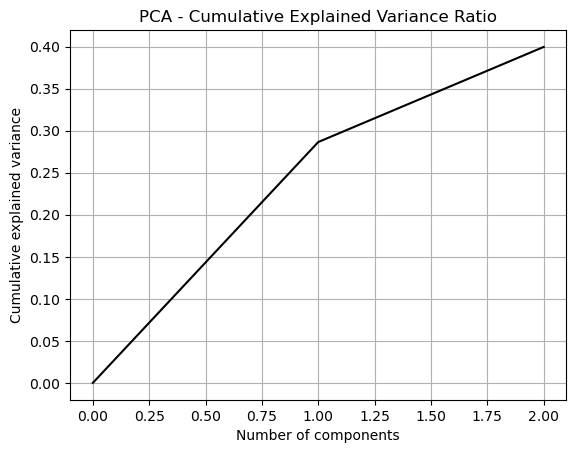

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.decomposition import PCA
# train_test_split
n=2

pipeline = Pipeline(
    [
        ('Imputer', SimpleImputer()),
        ('Scaler', MinMaxScaler(feature_range=(0, 1))),
        ('PCA', PCA(n_components=n)),
    ]
)


# do PCA dim reduction to 5
pca = PCA(n_components=n)
pca_evr = pca.fit(scale(imp_df))

pca_evr = (pca.explained_variance_ratio_)



pca_evr = np.concatenate((np.zeros(1), pca_evr))
plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Cumulative Explained Variance Ratio")
plt.grid()
print(np.cumsum(pca_evr))

[0.         0.28652517 0.39963327 0.48439665 0.53745837 0.58298589
 0.61546609 0.64418179 0.66974349 0.6930082  0.71317994]


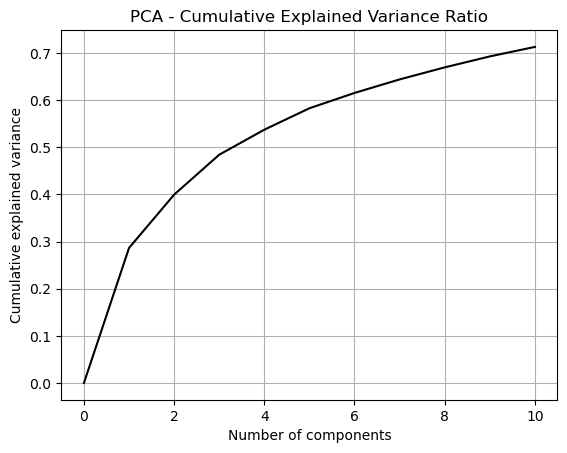

In [12]:
from sklearn.preprocessing import StandardScaler


n=10

pipeline = Pipeline(
    [
        ('Imputer', SimpleImputer()),
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components=n)),
    ]
)
pipeline.fit(df.values)
pca_evr =pipeline["PCA"].explained_variance_ratio_
pca_evr = np.concatenate((np.zeros(1), pca_evr))
plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Cumulative Explained Variance Ratio")
plt.grid()
print(np.cumsum(pca_evr))


In [15]:
# assert isinstance(imp_df, np.ndarray)
# means, variance, labels = expectation_max_multi_var(pipeline.transform(imp_df), 10, estimate_proportion=True)

In [16]:
# plot_cluster_2d(pca.transform(imp_df), means, variance)

<Axes: >

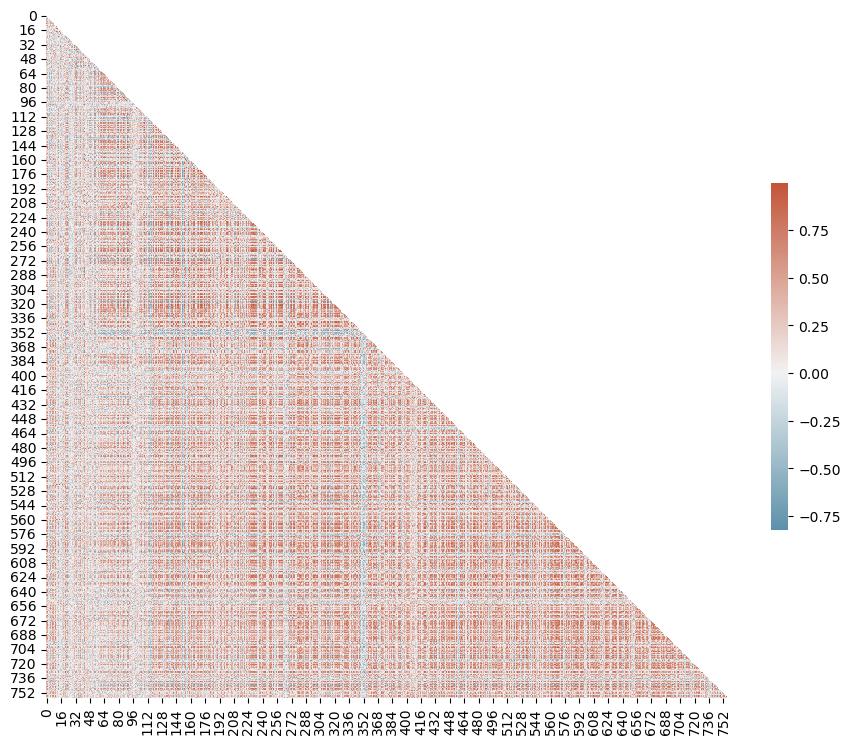

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, cbar_kws={"shrink": .5})

0.8561163077068721

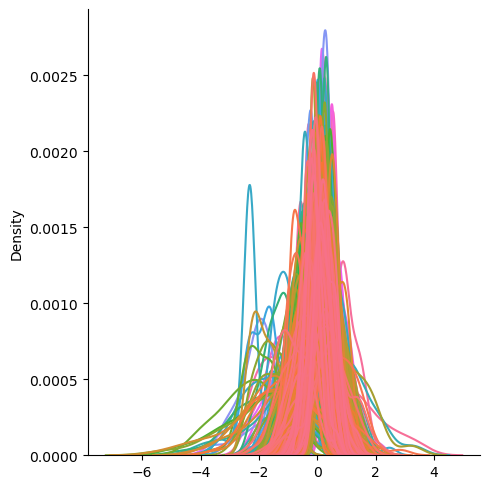

In [19]:
sns.displot(df, kind='kde', legend=False)

In [22]:
U, impute = softimpute(df.values, 0.1)
display(impute)

array([[ 0.68872799,  0.06791011, -0.738929  , ...,  0.41139271,
         0.24003554, -0.34445147],
       [-0.21271986,  0.11024161, -0.10991489, ...,  0.27817391,
         0.11469736, -0.00562868],
       [ 0.49878314, -0.2191136 , -0.58472624, ...,  0.00507326,
         0.05560159, -0.4868051 ],
       ...,
       [ 0.27281525, -0.15204121, -0.07282859, ...,  0.19688787,
         0.41545486, -0.12193684],
       [ 0.24299623, -0.48716497, -0.18041769, ...,  0.16375493,
         0.23603253, -0.10565389],
       [ 0.0446016 , -0.60096978, -0.16262938, ..., -0.4069241 ,
        -0.44735631, -0.18108889]])

In [25]:
df_imputed = pd.DataFrame(impute)
display(df_imputed)


,0,1,2,3,4,5,6,7,8,9,...,748,749,750,751,752,753,754,755,756,757
0,0.688728,0.067910,-0.738929,0.245575,0.239510,-0.869971,0.572017,-0.268840,0.547003,-0.623860,...,0.233155,0.287330,-0.333830,-0.406076,0.266113,0.147915,-0.449871,0.411393,0.240036,-0.344451
1,-0.212720,0.110242,-0.109915,-0.073991,0.127629,0.399930,0.340113,0.055739,0.233411,-0.438771,...,0.170940,-0.174583,0.166672,0.093880,0.051021,-0.146270,0.465843,0.278174,0.114697,-0.005629
2,0.498783,-0.219114,-0.584726,-0.317213,0.283365,-0.366042,0.029873,-0.395090,0.418191,-0.388759,...,-0.045587,0.115181,-0.647389,0.030623,-0.000143,0.076802,0.674586,0.005073,0.055602,-0.486805
3,0.836527,-0.007928,0.184901,-0.238237,0.047755,-0.624458,0.578126,-0.028300,0.640645,-0.255249,...,-0.104989,0.400782,-0.737486,0.083542,0.186088,0.241008,0.208321,0.780210,0.598281,-0.655308
4,0.753066,-0.126895,-0.124804,-0.234355,0.235801,-0.347605,0.197955,-0.196427,0.589923,-0.409061,...,0.004582,0.135805,-0.654828,0.093014,0.053536,0.200007,0.208008,0.193115,0.140374,-0.536342
5,-0.212667,0.312428,-0.182223,-0.455127,0.070632,-0.154926,0.142759,0.097813,0.196333,-0.167775,...,0.235709,-0.010080,-0.467100,-0.299350,-0.050622,-0.177462,0.170710,0.185872,0.210312,-0.337252
6,0.942724,0.205479,0.106920,-0.326878,0.317133,-0.561274,0.919904,0.023466,1.159427,0.064051,...,0.339569,0.777381,-0.509103,-0.033741,0.433304,0.460558,0.584391,1.035979,0.879964,-0.589607
7,-0.452367,0.228858,-0.280529,-0.493662,-0.216095,-0.108178,0.036152,0.070807,0.053868,-0.573183,...,-0.203926,-0.024358,-0.799801,-0.252667,-0.292689,0.003164,-0.081353,-0.073586,-0.051509,-0.380977
8,-0.077101,0.112608,-0.110598,-0.123100,-0.247166,0.059304,0.486209,0.583128,0.457143,-0.479844,...,0.222074,0.060224,0.037981,0.410436,0.163879,0.393134,0.523234,0.202814,0.498237,0.097221
9,0.451115,0.152407,-0.379498,-0.380940,0.167056,-0.471087,0.391493,-0.079796,0.556191,-0.373068,...,0.190132,0.252657,-0.550389,0.223896,0.160713,0.211305,-0.790732,0.412057,0.373390,-0.667712


<Axes: >

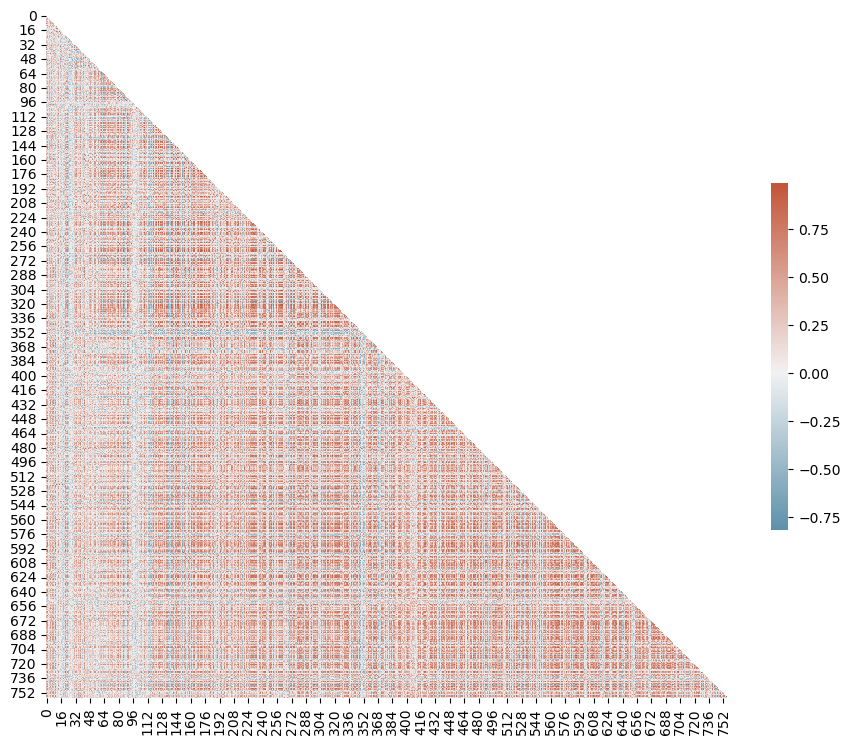

In [26]:
corr = df_imputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, cbar_kws={"shrink": .5})

In [27]:
print(df_imputed.shape, df.shape)

(50, 758) (50, 758)


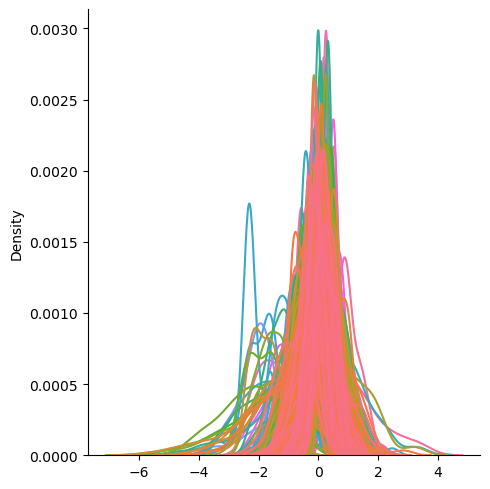

In [28]:
sns.displot(df_imputed, kind='kde', legend=False)